In [2]:
token=''
with open('.token', 'r') as f:
    token = f.read().strip()

In [4]:
import requests
#Read .token file

root = "https://www.ensembledata.com/apis"
endpoint = "/tt/user/posts"
params = {
  "username": "lilmiquela",
  "depth": 50,
  "start_cursor": 0,
  "oldest_createtime": 0,
  "token": token
}


res = requests.get(root+endpoint, params=params)
print(res.json())
#Save response to file
with open('lilmiquela_posts.json', 'w') as f:
    f.write(res.text)

ModuleNotFoundError: No module named 'requests'

The next fragment of code is used to collect all hashtags from the posts, that way we can select which one to use as a flag to identify 'past' and 'present' posts

In [5]:

import json
#read file as a string
with open('lilmiquela_posts.json', 'r') as f:
    data = f.read()
#convert string to json
data = json.loads(data)
all_hashtags = []
for post in data['data']:
    #Get all the words appearing after #
    hashtags = [word for word in post['desc'].split() if word[0] == '#']
    #Remove # from hashtags
    hashtags = [word[1:] for word in hashtags]
    #convert to lower case
    hashtags = [word.lower() for word in hashtags]
    #Add hashtags to list
    all_hashtags.append(hashtags)
#remove all duplicates from list
all_hashtags = list(set([item for sublist in all_hashtags for item in sublist]))
print(all_hashtags)
#Save hashtags to csv file
with open('lilmiquela_hashtags.csv', 'w') as f:
    f.write('\n'.join(all_hashtags))


['inlove', 'whatwillilooklike', 'summerrecap', 'conspiracytheory', 'animegirl', 'hbo', 'illblowup', 'howtosmile', 'dior', 'talkingtothemoon', 'idontwannagothere', 'moneymusicvideo', 'factsaboutme', 'breakup', 'plottwist', '10pictureschallenge', 'bored', 'notthemaincharacter', 'feliznavidad', 'glitch', 'polarexpress', 'pacsun', 'foodontiktok', 'parents', 'getrealmiquela', 'levitating', 'rosalia', 'thephoto', 'bitcoin', 'familyimpression', 'swimmercheck', 'diyprojects', 'deeprealization', 'spelling', 'nosepainting', 'fitcheck', 'naturescereal', 'gaminglife', 'society', 'questionsigetasked', 'renaissancechallenge', 'teslarobot', 'dontbesurprised', 'karpoolkaraoke', 'mentalhealthawareness', 'robotversion', 'crazy', 'qanda', 'relatable', 'squidgame', 'remix', 'letsplay', 'hack', 'storytime', 'answeringquestions', 'fy', 'realtalk', 'wellness', 'lifeisgood', 'notjustme', 'animeedit', 'checkyourvibe', 'mustbenice', 'wewintogether', 'cozyathome', 'inverted', 'good4u', 'kendricklamar', 'enchante

Now we get all the statistics from each post, we split them in 2 lists (one for present and one for past), and we get the id of the 3 best and 3 worst post of the two categories

In [98]:

import json
#read file as a string
with open('lilmiquela_posts.json', 'r') as f:
    data = f.read()
#convert string to json
data = json.loads(data)
#Get post titles
#Def empty matrix
posts = {}
#Define a list of flags that define throwback posts
past_flags= ['whenimolder', 'illneverforgetyou', 'backintheday', 'teenagedirtbag', 'waitforit', 'transformation', 'whatwillilooklike', 'notaperfectperson', 'dejavu', 'ohtakemebacktothenightwemet', 'evolution', 'breakup', 'upgradechallenge', 'yearinreview', '2018vs2021', 'mylife', 'beentheredonethat', 'storytime', '2020rewind', 'justdancemoves', 'crazystory', '2021rewind', 'timewarpjump', 'deeprealization', 'yearontiktok', 'leftmeonread', 'breakuptiktok', 'throwback', 'beforeandafter']
past_posts = {}
present_posts = {}

# Function to calculate a simple engagement score for a post
def calculate_engagement_score(post):
    play_count, digg_count, comment_count, share_count = post[2], post[3], post[4], post[5]
    # Simple formula to calculate score: Sum of all counts
    return play_count + digg_count + comment_count + share_count

# Process each post in the data
for i, post in enumerate(data['data']):
    # Extract relevant information from each post
    post_info = [post['aweme_id'], post['desc'], post['statistics']['play_count'], post['statistics']['digg_count'], post['statistics']['comment_count'], post['statistics']['share_count']]
    
    # Extract hashtags from the post description
    hashtags = [word[1:].lower() for word in post['desc'].split() if word.startswith('#')]

    # Check if any of the hashtags matches the past flags
    is_past_post = any(hashtag in past_flags for hashtag in hashtags)

    # Categorize the post as either past or present based on hashtags
    if is_past_post:
        past_posts[i] = post_info
    else:
        present_posts[i] = post_info

# Finding the best 3 posts for past and present based on engagement score
best_past_posts = sorted(past_posts.values(), key=calculate_engagement_score, reverse=True)[:3]
best_present_posts = sorted(present_posts.values(), key=calculate_engagement_score, reverse=True)[:3]

# Output the best 3 past and present posts
print("Best 3 Past Posts:", best_past_posts)
print("Best 3 Present Posts:", best_present_posts)











Best 3 Past Posts: [['7040550342274092294', 'All Glewed Up #Robot #16missedcalls  #backintheday', 20859873, 1837914, 18422, 16625], ['7129589619099847982', 'I win this trend #teenagedirtbag #emo #throwback', 11306092, 1472456, 6497, 3362], ['6820442784093228294', 'Did I invent a thing? IDK, but it feels like it. #breakup #feelings #notjustme', 8803245, 754274, 10691, 11592]]
Best 3 Present Posts: [['6857638022805032197', 'What’s Polar Express? #ReplyToComments #NopeYup #CheckYourVibe', 50937625, 7864894, 110033, 52887], ['6821996652581113093', 'It’s upsetting me and my homegirl #answeringquestions #fy #mepracticing', 23897721, 2956151, 50698, 48269], ['7027954993026190598', 'tell me ur favorite robots #ilikeyouhaveacupcake #rating #robot', 11180434, 1337570, 5727, 2306]]


In [ ]:
import requests
import json

def fetch_all_comments(aweme_id, token, max_comments=300):
    root = "https://www.ensembledata.com/apis"
    endpoint = "/tt/post/comments"
    all_comments = []
    cursor = 0

    while len(all_comments) < max_comments:
        params = {
            "aweme_id": aweme_id,
            "cursor": cursor,
            "token": token
        }
        response = requests.get(root + endpoint, params=params)
        data = response.json()
        
        comments = data.get('data', {}).get('comments', [])
        all_comments.extend(comments[:max_comments - len(all_comments)])
        
        # Update the cursor for the next iteration
        cursor = data.get('data', {}).get('nextCursor', 0)
        
        # Break if there are no more comments
        if cursor == 0:
            break

    return all_comments

# Arrays of tokens and aweme_id values
tokens = ["3MfzVGSgUkHF1vWr", "qoQANMRiT2pSYTQC", "9vit7ZC5TBelMgyr"]  # Replace with your actual tokens
best_past_posts_aweme_ids = [7040550342274092294,7129589619099847982,6820442784093228294]
best_present_posts_aweme_ids = [6857638022805032197,6821996652581113093,7027954993026190598]

# Initialize a dictionary to store comments
all_comments = {}

# Fetch and store comments for each post using different tokens
for i, aweme_id in enumerate(best_past_posts_aweme_ids + best_present_posts_aweme_ids):
    token = tokens[i % len(tokens)]  # Round-robin selection of token
    comments = fetch_all_comments(aweme_id, token)
    all_comments[aweme_id] = comments

# Save the comments to a file
with open('lilmiquela_all_comments.json', 'w') as f:
    json.dump(all_comments, f, indent=4)

print("Comments fetched and saved for all best posts.")


Divide comments in present and past and keep only text

In [123]:
best_past_posts_aweme_ids = [7040550342274092294,7129589619099847982,6820442784093228294]
best_present_posts_aweme_ids = [6857638022805032197,6821996652581113093,7027954993026190598]
#Load all comments from file
with open('lilmiquela_all_comments.json', 'r') as f:
    all_comments = json.load(f)
#Get all comments for each past post
past_post_comments = []
comments_tmp = []
for id in best_past_posts_aweme_ids:
    comments_tmp = all_comments[str(id)]
    for comment in comments_tmp:
        past_post_comments.append(comment['text'])
#Get all comments for each present post
present_post_comments = []
for id in best_present_posts_aweme_ids:
    comments_tmp = all_comments[str(id)]
    for comment in comments_tmp:
        present_post_comments.append(comment['text'])
#Save comments to csv file  
with open('lilmiquela_past_comments.csv', 'w') as f:
    f.write('\n'.join(past_post_comments))
with open('lilmiquela_present_comments.csv', 'w') as f:
    f.write('\n'.join(present_post_comments))







Sentiment analysis
Sentiment analysis pipeline
https://huggingface.co/finiteautomata
https://huggingface.co/blog/sentiment-analysis-python

In [165]:
#Load all comments from file
#Past comments
with open('lilmiquela_past_comments.csv', 'r') as f:
    past_comments = f.read().splitlines()
#Present comments
with open('lilmiquela_present_comments.csv', 'r') as f:
    present_comments = f.read().splitlines()

#Remove all commas from comments
past_comments = [comment.replace(',', '') for comment in past_comments]
present_comments = [comment.replace(',', '') for comment in present_comments]
    
from transformers import pipeline
specific_model_emotion = pipeline(model="finiteautomata/bertweet-base-emotion-analysis")
specific_model_sentiment = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
from keybert import KeyBERT
kw_model = KeyBERT(model='all-mpnet-base-v2')

#Get emotion and sentiment for past comments
keywords_past = kw_model.extract_keywords(past_comments,keyphrase_ngram_range=(1, 1),stop_words='english',highlight=False,top_n=1)
emotion_res_past = specific_model_emotion(past_comments)
sentiment_res_past = specific_model_sentiment(past_comments)
#Get emotion and sentiment for present comments
keywords_present = kw_model.extract_keywords(present_comments,keyphrase_ngram_range=(1, 1),stop_words='english',highlight=False,top_n=1)
emotion_res_present = specific_model_emotion(present_comments)
sentiment_res_present = specific_model_sentiment(present_comments)


Save to file

In [166]:
header=['comment','keyword','emotion', 'sentiment']
#Save emotion and sentiment to csv file in the format: comment,keyword, emotion, sentiment
with open('sentiment_analysis/lilmiquela_past_emotion_sentiment.csv', 'w') as f:
    f.write(','.join(header)+'\n')
    for i in range(len(past_comments)):
        keyword = keywords_past[i]
        #If not keyword found, use the comment as keyword
        if len(keyword) == 0:
            keyword = past_comments[i]
        else:
            keyword = keyword[0][0]

        f.write(past_comments[i]+','+keyword+','+emotion_res_past[i]['label']+','+sentiment_res_past[i]['label']+'\n')
with open('sentiment_analysis/lilmiquela_present_emotion_sentiment.csv', 'w') as f:
    f.write(','.join(header)+'\n')
    for i in range(len(present_comments)):
        keyword = keywords_present[i]
        #If not keyword found, use the comment as keyword
        if len(keyword) == 0:
            keyword = present_comments[i]
        else:
            keyword = keyword[0][0]

        f.write(present_comments[i]+','+keyword+','+emotion_res_present[i]['label']+','+sentiment_res_present[i]['label']+'\n')

Prepare data for graph

In [257]:
#Read emotion and sentiment from csv file
import pandas as pd
past_df = pd.read_csv('sentiment_analysis/lilmiquela_past_emotion_sentiment.csv')
present_df = pd.read_csv('sentiment_analysis/lilmiquela_present_emotion_sentiment.csv')

#Count the number of times each keyword is associated with each emotion and save for each keyword the emotion with the highest count
past_dict = {}
for index, row in past_df.iterrows():
    keyword = row['keyword']
    emotion = row['emotion']
    if keyword not in past_dict:
        past_dict[keyword] = {}
    if emotion not in past_dict[keyword]:
        past_dict[keyword][emotion] = 0
    past_dict[keyword][emotion] += 1

#Create a csv file with the format: id,label
header=['Id','Label']
emotion_ids = []
keyword_ids = []
rows = []
i=1
for emotion in past_df['emotion'].value_counts().index.tolist():
    rows.append(str(i)+","+emotion)
    emotion_ids.append(emotion)
    i+=1
for keyword in past_dict:
    rows.append(str(i)+","+keyword)
    keyword_ids.append(keyword)
    i+=1

#Save rows to csv file
with open('sentiment_analysis/gephi/lilmiquela_past_emotion_nodes.csv', 'w') as f:
    f.write(','.join(header)+'\n')
    f.write('\n'.join(rows))

#Create a csv file with the format: Source,Target,Label,Weight
header=['Source','Target','Label','Weight']
rows = []
i=1
for keyword,emotion in past_dict.items():
    #Get emotion key from emotion value
    emotion_key = list(emotion.keys())[0]
    #Get emotion count as weight
    weight = list(emotion.values())[0]
    #Get emotion id
    source = emotion_ids.index(emotion_key)+1
    #Get keyword id
    target = i+len(emotion_ids)
    rows.append(str(source)+","+str(target)+","+keyword+" - "+emotion_key+","+str(weight))
    i+=1
#Save rows to csv file
with open('sentiment_analysis/gephi/lilmiquela_past_emotion_edges.csv', 'w') as f:
    f.write(','.join(header)+'\n')
    f.write('\n'.join(rows))

#Same for present comments
present_dict = {}
for index, row in present_df.iterrows():
    keyword = row['keyword']
    emotion = row['emotion']
    if keyword not in present_dict:
        present_dict[keyword] = {}
    if emotion not in present_dict[keyword]:
        present_dict[keyword][emotion] = 0
    present_dict[keyword][emotion] += 1

#Create a csv file with the format: id,label
header=['Id','Label']
emotion_ids = []
keyword_ids = []
rows = []
i=1
for emotion in present_df['emotion'].value_counts().index.tolist():
    rows.append(str(i)+","+emotion)
    emotion_ids.append(emotion)
    i+=1
for keyword in present_dict:
    rows.append(str(i)+","+keyword)
    keyword_ids.append(keyword)
    i+=1

#Save rows to csv file
with open('sentiment_analysis/gephi/lilmiquela_present_emotion_nodes.csv', 'w') as f:
    f.write(','.join(header)+'\n')
    f.write('\n'.join(rows))

#Create a csv file with the format: Source,Target,Label,Weight
header=['Source','Target','Label','Weight']
rows = []
i=1
for keyword,emotion in present_dict.items():
    #Get emotion key from emotion value
    emotion_key = list(emotion.keys())[0]
    #Get emotion count as weight
    weight = list(emotion.values())[0]
    #Get emotion id
    source = emotion_ids.index(emotion_key)+1
    #Get keyword id
    target = i+len(emotion_ids)
    rows.append(str(source)+","+str(target)+","+keyword+" - "+emotion_key+","+str(weight))
    i+=1
#Save rows to csv file
with open('sentiment_analysis/gephi/lilmiquela_present_emotion_edges.csv', 'w') as f:
    f.write(','.join(header)+'\n')
    f.write('\n'.join(rows))

    


    

Past Graph

<Figure size 1500x1500 with 0 Axes>

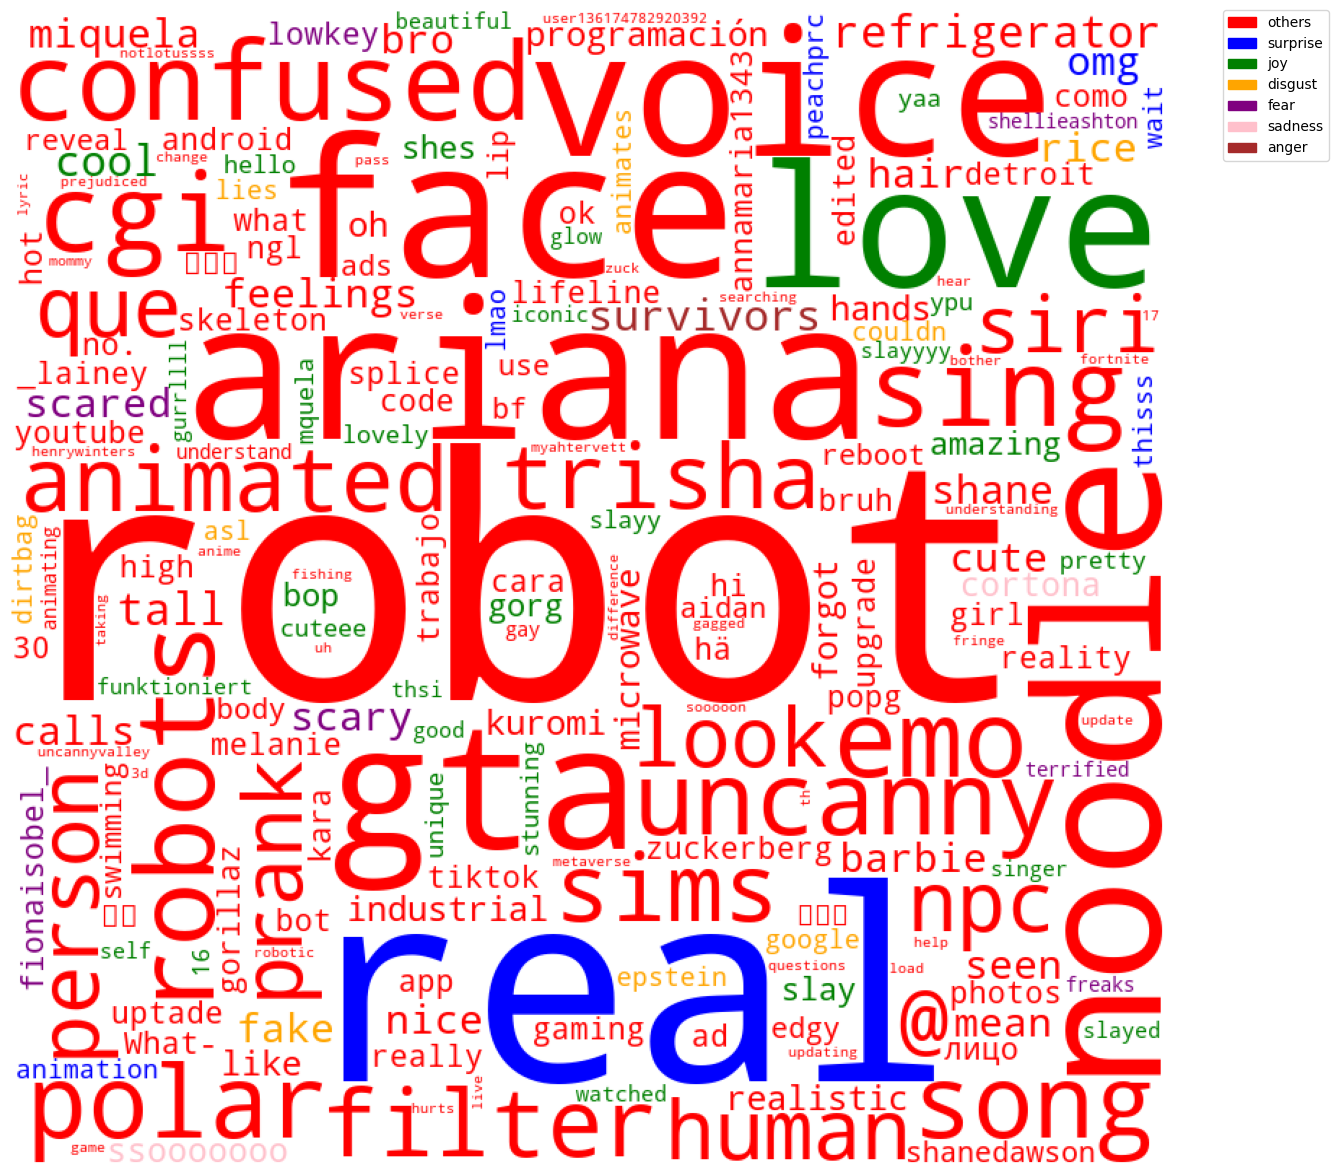

In [327]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from wordcloud import WordCloud
import pandas as pd
import networkx as nx

#Load gephi files
past_nodes = pd.read_csv('sentiment_analysis/gephi/lilmiquela_past_emotion_nodes.csv')
past_edges = pd.read_csv('sentiment_analysis/gephi/lilmiquela_past_emotion_edges.csv')

#Generate a graph for past comments

past_graph = nx.Graph()
#Add nodes
for index, row in past_nodes.iterrows():
    past_graph.add_node(row['Id'], label=row['Label'])
#Add edges
for index, row in past_edges.iterrows():
    past_graph.add_edge(row['Source'], row['Target'], label=row['Label'], weight=row['Weight'])
#Get pagerank for each node
past_pagerank = nx.pagerank(past_graph)
#Apply community detection
past_communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(past_graph)

##Define a color for each community
past_community_color = {}
#Color map 
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'grey', 'black']
#Define a color for each node based on the community it belongs to and use the node label as key
for i, community in enumerate(past_communities):
    for node in community:
        #Get the node label corresponding to the node id
        node_label = past_graph.nodes[node]['label']
        #Assign a color to the node
        past_community_color[node_label] = colors[i]

#Get first 8 nodes from past_nodes
past_emotions = past_nodes.head(7)['Id'].tolist()

#Define a legend for the colors, the key is the label of the largest node in the community and the value is the color
past_legend = {}
for id in past_emotions:
    #Get the node label corresponding to the node id
    node_label = past_graph.nodes[id]['label']
    #Get the color corresponding to the node label
    node_color = past_community_color[node_label]
    #Add the node label and color to the legend
    past_legend[node_label] = node_color
    #Remove the node from graph
    past_graph.remove_node(id)

#Generate an image of the legend
#Create a figure
fig = plt.figure(figsize=(15, 15))
#Create a legend
patches = []
for label, color in past_legend.items():
    patches.append(mpatches.Patch(color=color, label=label))

#Create a word cloud for past comments according to pagerank
#Generate dictionary of words and their pagerank
past_wordcloud_dict = {}
for node in past_graph.nodes:
    #Get the node label corresponding to the node id
    node_label = past_graph.nodes[node]['label']
    #Get the node pagerank
    node_pagerank = past_pagerank[node]
    #Add the node label and pagerank to the dictionary
    past_wordcloud_dict[node_label] = node_pagerank
#Generate the word cloud
past_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(past_wordcloud_dict)
#Recolor the word cloud according to the community each word belongs to
#Define a function to recolor the word cloud
def recolor(word, font_size, position, orientation, random_state=None, **kwargs):
    return past_community_color[word]
#Recolor the word cloud
past_wordcloud.recolor(color_func=recolor)
# plot the WordCloud image
plt.figure(figsize=(15, 15), facecolor=None)
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.imshow(past_wordcloud)
plt.axis("off")
plt.show()


<Figure size 1500x1500 with 0 Axes>

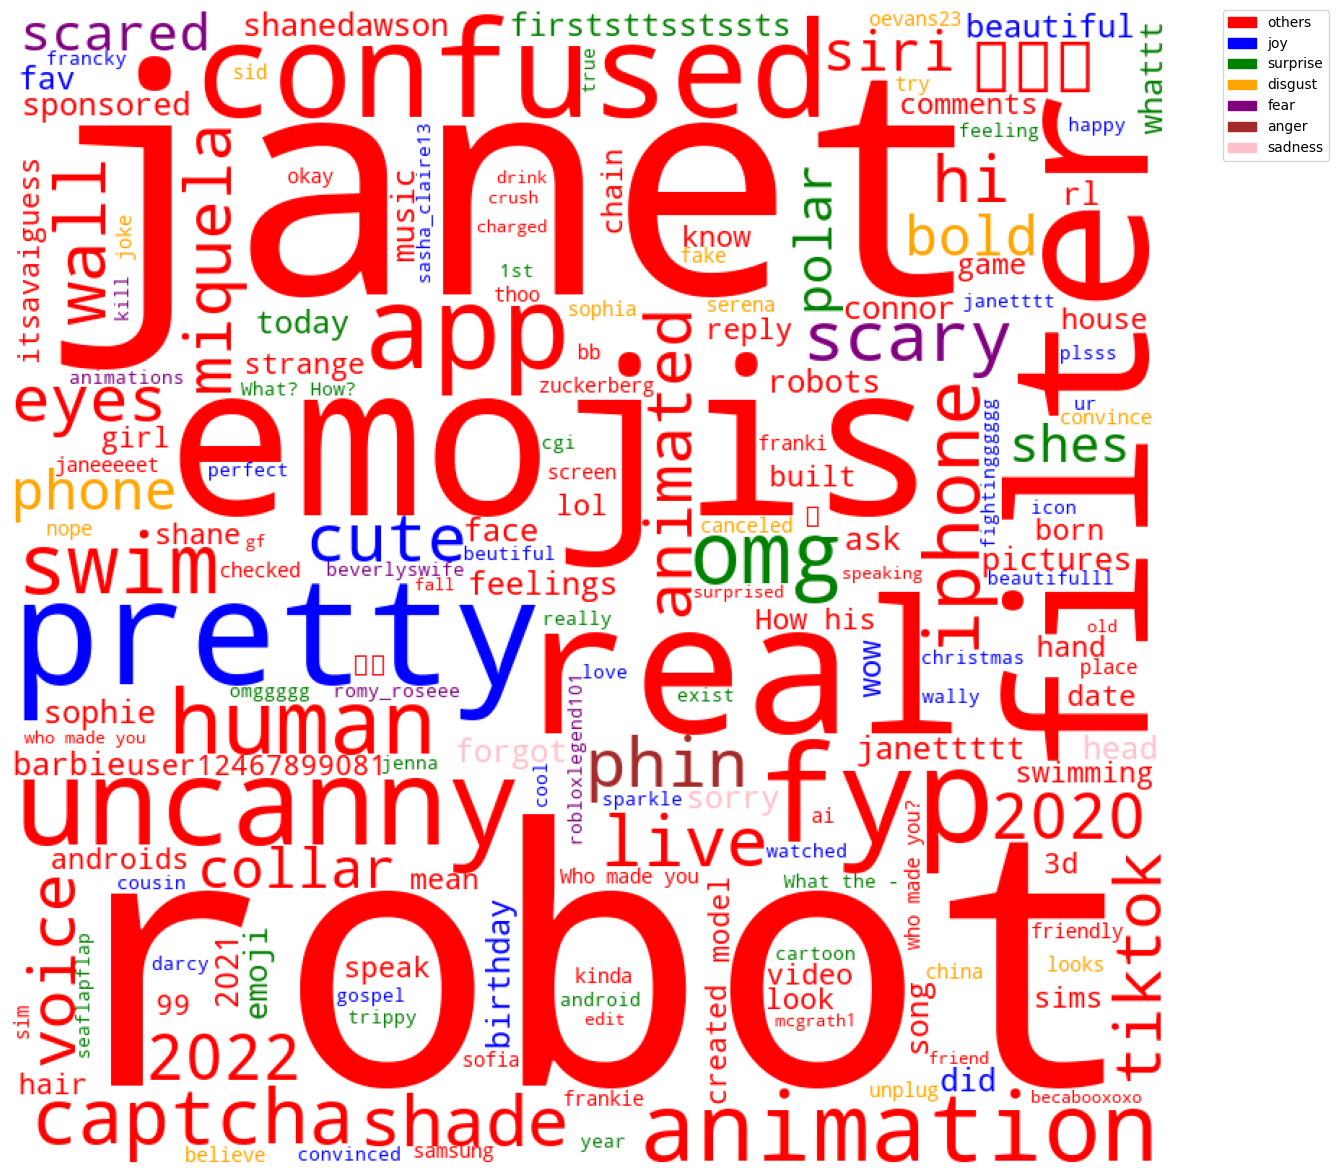

In [328]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from wordcloud import WordCloud
import pandas as pd
import networkx as nx

#Load gephi files
present_nodes = pd.read_csv('sentiment_analysis/gephi/lilmiquela_present_emotion_nodes.csv')
present_edges = pd.read_csv('sentiment_analysis/gephi/lilmiquela_present_emotion_edges.csv')

#Generate a graph for present comments
present_graph = nx.Graph()
#Add nodes
for index, row in present_nodes.iterrows():
    present_graph.add_node(row['Id'], label=row['Label'])
#Add edges
for index, row in present_edges.iterrows():
    present_graph.add_edge(row['Source'], row['Target'], label=row['Label'], weight=row['Weight'])
#Get pagerank for each node
present_pagerank = nx.pagerank(present_graph)
#Apply community detection
present_communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(present_graph)

##Define a color for each community
present_community_color = {}
#Color map
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'grey', 'black']
#Define a color for each node based on the community it belongs to and use the node label as key
for i, community in enumerate(present_communities):
    for node in community:
        #Get the node label corresponding to the node id
        node_label = present_graph.nodes[node]['label']
        #Assign a color to the node
        present_community_color[node_label] = colors[i]

#Get first 8 nodes from present_nodes
present_emotions = present_nodes.head(7)['Id'].tolist()

#Define a legend for the colors, the key is the label of the largest node in the community and the value is the color
present_legend = {}
for id in present_emotions:
    #Get the node label corresponding to the node id
    node_label = present_graph.nodes[id]['label']
    #Get the color corresponding to the node label
    node_color = present_community_color[node_label]
    #Add the node label and color to the legend
    present_legend[node_label] = node_color
    #Remove the node from graph
    present_graph.remove_node(id)

#Generate an image of the legend
#Create a figure
fig = plt.figure(figsize=(15, 15))
#Create a legend
patches = []
for label, color in present_legend.items():
    patches.append(mpatches.Patch(color=color, label=label))

#Create a word cloud for present comments according to pagerank
#Generate dictionary of words and their pagerank
present_wordcloud_dict = {}
for node in present_graph.nodes:
    #Get the node label corresponding to the node id
    node_label = present_graph.nodes[node]['label']
    #Get the node pagerank
    node_pagerank = present_pagerank[node]
    #Add the node label and pagerank to the dictionary
    present_wordcloud_dict[node_label] = node_pagerank
#Generate the word cloud
present_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(present_wordcloud_dict)
#Recolor the word cloud according to the community each word belongs to
#Define a function to recolor the word cloud
def recolor(word, font_size, position, orientation, random_state=None, **kwargs):
    return present_community_color[word]
#Recolor the word cloud
present_wordcloud.recolor(color_func=recolor)
# plot the WordCloud image
plt.figure(figsize=(15, 15), facecolor=None)
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.imshow(present_wordcloud)
plt.axis("off")
plt.show()
